In [2]:
import sys,os,re,csv,codecs,numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation
from keras.layers import Bidirectional, GlobalMaxPool1D
from keras.models import Model
from keras import initializers, regularizers, constraints, optimizers, layers

In [3]:
train=pd.read_csv('../input/toxic-comment/train.csv')
test=pd.read_csv('../input/toxic-comment/test.csv')

In [4]:
train.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [6]:
train.isnull().any()
test.isnull().any()

id              False
comment_text    False
dtype: bool

In [7]:
list_classes=['toxic','severe_toxic','obscene','threat','insult','identity_hate']
y=train[list_classes].values
list_sentences_train=train['comment_text']
list_sentences_test=test['comment_text']

In [8]:
max_features=20000
tokenizer=Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(list(list_sentences_train))
list_tokenized_train=tokenizer.texts_to_sequences(list_sentences_train)
list_tokenized_test=tokenizer.texts_to_sequences(list_sentences_test)

In [9]:
list_tokenized_train[:1]

[[688,
  75,
  1,
  126,
  130,
  177,
  29,
  672,
  4511,
  12052,
  1116,
  86,
  331,
  51,
  2278,
  11448,
  50,
  6864,
  15,
  60,
  2756,
  148,
  7,
  2937,
  34,
  117,
  1221,
  15190,
  2825,
  4,
  45,
  59,
  244,
  1,
  365,
  31,
  1,
  38,
  27,
  143,
  73,
  3462,
  89,
  3085,
  4583,
  2273,
  985]]

In [10]:
maxlen=200
X_t=pad_sequences(list_tokenized_train,maxlen=maxlen)
X_te=pad_sequences(list_tokenized_test,maxlen=maxlen)

In [11]:
totalNumWords=[len(one_comment) for one_comment in list_tokenized_train]

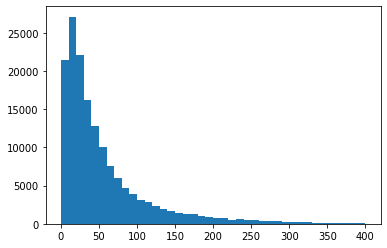

In [12]:
plt.hist(totalNumWords,bins=np.arange(0,410,10))
plt.show()

### Finally the start of building our model!

In [13]:
inp=Input(shape=(maxlen,))

In [14]:
embed_size=128
x=Embedding(max_features,embed_size)(inp)

In [15]:
x=LSTM(60,return_sequences=True,name='lstm_layer')(x)

In [16]:
x=GlobalMaxPool1D()(x)

In [17]:
x=Dropout(0.1)(x)

### Activation((Input X Weights) + Bias)

In [18]:
x = Dense(50, activation="relu")(x)

In [19]:
x = Dropout(0.1)(x)

In [20]:
x = Dense(6, activation="sigmoid")(x)

In [21]:
model = Model(inputs=inp, outputs=x)
model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

In [22]:
batch_size = 32
epochs = 2
model.fit(X_t,y, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/2
4488/4488 [==============================] - 506s 112ms/step - loss: 0.1079 - accuracy: 0.8421 - val_loss: 0.0485 - val_accuracy: 0.9940
Epoch 2/2
4488/4488 [==============================] - 507s 113ms/step - loss: 0.0442 - accuracy: 0.9871 - val_loss: 0.0467 - val_accuracy: 0.9939


### Additional tips and tricks

In [23]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 200)]             0         
_________________________________________________________________
embedding (Embedding)        (None, 200, 128)          2560000   
_________________________________________________________________
lstm_layer (LSTM)            (None, 200, 60)           45360     
_________________________________________________________________
global_max_pooling1d (Global (None, 60)                0         
_________________________________________________________________
dropout (Dropout)            (None, 60)                0         
_________________________________________________________________
dense (Dense)                (None, 50)                3050      
_________________________________________________________________
dropout_1 (Dropout)          (None, 50)                0     

In [24]:
from keras import backend as K

# with a Sequential model
get_3rd_layer_output = K.function([model.layers[0].input],
                                  [model.layers[2].output])
layer_output = get_3rd_layer_output([X_t[:1]])[0]
layer_output.shape
#print layer_output to see the actual data

(1, 200, 60)

https://www.kaggle.com/sbongo/for-beginners-tackling-toxic-using-keras/notebook